# Target = 'Recommended IND'

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv('womens-clothing-clean-2.csv')

#### Feature Engineering

In [29]:
x=pd.get_dummies(data[['Age', 'Rating', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']])
y=data['Recommended IND']

#### Standard Scaler

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
#to fill transform the 0 dummies data into 1 and -1
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [32]:
x_scaled_df = pd.DataFrame(data_scaled,columns=x.columns)

#### Handling Imbalanced Data

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [34]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# 4. Modelling

#### Table Scoring

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [36]:
#Test Scoring

list_sample = ['undersampling', 'ros', 'smote', 'class_weight']
list_model = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier]
index_model=['LogisticRegression 0','LogisticRegression 1','DecisionTreeClassifier 0','DecisionTreeClassifier 1','RandomForestClassifier 0','RandomForestClassifier 1','GradientBoostingClassifier 0', 'GradientBoostingClassifier 1']

#Undersampling:

minority_data = data[data['Recommended IND']==0]
mayority_data = data[data['Recommended IND']==1]
index_for_mayority = np.random.choice(mayority_data.index, len(minority_data))
data_class_0 = data.loc[index_for_mayority]
undersampling_data = pd.concat([data_class_0, minority_data])
x_under=pd.get_dummies(undersampling_data[['Age', 'Rating', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']])
data_scaled_under = scaler.fit_transform(x_under)
x_under_scaled=pd.DataFrame(data_scaled_under,columns=x_under.columns)
y_under=undersampling_data['Recommended IND']

US_precision = []
US_recall = []
for i,item in enumerate(list_model):
    X_tr, X_ts, y_tr, y_ts=train_test_split(x_under_scaled,y_under,random_state=101)
    US_model=item()
    US_model.fit(X_tr, y_tr)
    US_predict=US_model.predict(X_ts)
    US_predict_train=US_model.predict(X_tr)
    aa=confusion_matrix(y_ts, US_predict)

    #precision 0
    pre_0=round((aa[0][0])/((aa[0][0])+(aa[1][0])),2)
    US_precision.append(pre_0)

    #precision 1(berasal dari true positif):
    pre_1=round((aa[1][1])/((aa[1][1])+(aa[0][1])),2)
    US_precision.append(pre_1)

    #recall 0:
    rec_0=round((aa[0][0])/((aa[0][0])+(aa[0][1])),2)
    US_recall.append(rec_0)

    #recall 1:
    rec_1=(round((aa[1][1])/((aa[1][1])+(aa[1][0])),2))
    US_recall.append(rec_1)
US={'US precision':US_precision, 'US recall':US_recall}
US=pd.DataFrame(US,index=index_model )


#ROS :

ROS_precision = []
ROS_recall = []
for i,item in enumerate(list_model):
    X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=101)
    ROS_model = item()
    ros = RandomOverSampler(random_state=101)
    X_ros, y_ros = ros.fit_sample(X_train,y_train)
    ROS_model.fit(X_ros,y_ros)
    ROS_predict_train=ROS_model.predict(X_ros)
    ROS_predict=ROS_model.predict(X_test)
    bb=confusion_matrix(y_test, ROS_predict)
    
    
    #precision 0
    pre_0=round((bb[0][0])/((bb[0][0])+(bb[1][0])),2)
    ROS_precision.append(pre_0)

    #precision 1(berasal dari true positif):
    pre_1=round((bb[1][1])/((bb[1][1])+(bb[0][1])),2)
    ROS_precision.append(pre_1)

    #recall 0:
    rec_0=round((bb[0][0])/((bb[0][0])+(bb[0][1])),2)
    ROS_recall.append(rec_0)

    #recall 1:
    rec_1=(round((bb[1][1])/((bb[1][1])+(bb[1][0])),2))
    ROS_recall.append(rec_1)
    
ROS={'ROS precision':ROS_precision, 'ROS recall':ROS_recall}
ROS=pd.DataFrame(ROS,index=index_model )

    
#SMOTE :

SMOTE_precision = []
SMOTE_recall = []
for i,item in enumerate(list_model):
    X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=101)
    SMOTE_model = item()
    sm = SMOTE(random_state=101)
    X_sm, y_sm = sm.fit_sample(X_train,y_train)
    SMOTE_model.fit(X_sm,y_sm)
    SMOTE_predict=SMOTE_model.predict(X_test)
    SMOTE_predict_train=SMOTE_model.predict(X_sm)
    cc=confusion_matrix(y_test, SMOTE_predict)
    
    
    #precision 0
    pre_0=round((cc[0][0])/((cc[0][0])+(cc[1][0])),2)
    SMOTE_precision.append(pre_0)

    #precision 1(berasal dari true positif):
    pre_1=round((cc[1][1])/((cc[1][1])+(cc[0][1])),2)
    SMOTE_precision.append(pre_1)

    #recall 0:
    rec_0=round((cc[0][0])/((cc[0][0])+(cc[0][1])),2)
    SMOTE_recall.append(rec_0)

    #recall 1:
    rec_1=(round((cc[1][1])/((cc[1][1])+(cc[1][0])),2))
    SMOTE_recall.append(rec_1)
    
SMOTE={'SMOTE precision':SMOTE_precision, 'SMOTE recall':SMOTE_recall}
SMOTE=pd.DataFrame(SMOTE,index=index_model)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'l

#### Based Accuracy Test:

In [37]:
US_accuracytest = accuracy_score(y_ts, US_predict)
ROS_accuracytest = accuracy_score(y_test, ROS_predict)
SMOTE_accuracytest=accuracy_score(y_test, SMOTE_predict)

US_accuracytrain = accuracy_score(y_tr, US_predict_train)
ROS_accuracytrain = accuracy_score(y_ros, ROS_predict_train)
SMOTE_accuracytrain=accuracy_score(y_sm, SMOTE_predict_train)


accuracy_train = [US_accuracytrain,ROS_accuracytrain,SMOTE_accuracytrain]
accuracy_test = [US_accuracytest, ROS_accuracytest, SMOTE_accuracytest]
accuracy = [accuracy_train, accuracy_test]
pd.DataFrame(data=accuracy, columns=['Undersampling', 'RandomOverSampling', 'SMOTE'], index=['Accuracy Train Score', 'Accuracy Test Score'])

,Undersampling,RandomOverSampling,SMOTE
Accuracy Train Score,0.943432,0.942909,0.956242
Accuracy Test Score,0.949664,0.939938,0.940110


- Based on the accuracy, the balance between train and test is Undersampling. otherwise the train smote is best score

#### Based on Precision and Recall

In [38]:
test_scoring_df = pd.concat([US,ROS,SMOTE], axis=1)
test_scoring_df

,US precision,US recall,ROS precision,ROS recall,SMOTE precision,SMOTE recall
LogisticRegression 0,0.94,0.96,0.76,0.96,0.76,0.96
LogisticRegression 1,0.95,0.94,0.99,0.94,0.99,0.94
DecisionTreeClassifier 0,0.91,0.92,0.73,0.80,0.74,0.82
DecisionTreeClassifier 1,0.92,0.91,0.96,0.94,0.96,0.94
RandomForestClassifier 0,0.92,0.94,0.74,0.87,0.77,0.86
RandomForestClassifier 1,0.94,0.92,0.97,0.94,0.97,0.95
GradientBoostingClassifier 0,0.94,0.96,0.76,0.96,0.76,0.96
GradientBoostingClassifier 1,0.95,0.94,0.99,0.94,0.99,0.94


- Based on the model the best score is using under_sampling. 2 models have same best score which is LogisticRegression and GradientBoostingClassifier. i just pick one model since it have same score

### Optimization model using GridSearch

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
#state model
lr= LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2' ]

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(lr, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(x_under, y_under)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Best Penalty: l2
Best C: 1.0


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
lr_optim = LogisticRegression(penalty='l1', C=1.0)
lr_optim.fit(X_tr, y_tr)
prediction_optim=US_model.predict(X_ts)
print(confusion_matrix(y_ts, prediction_optim))
print(classification_report(y_ts, prediction_optim))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[1006   46]
 [  59  975]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1052
           1       0.95      0.94      0.95      1034

   micro avg       0.95      0.95      0.95      2086
   macro avg       0.95      0.95      0.95      2086
weighted avg       0.95      0.95      0.95      2086



###  Simple Predict (actual vs prediction)

In [42]:
y_ts.iloc[2]

0

In [43]:
predict_data = US_model.predict([X_ts.iloc[2].values])[0]
predict_data

0

# Result

### Coeff

In [44]:
lr_optim.fit(X_tr, y_tr)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Text(0.5, 1.0, 'Coeffisien')

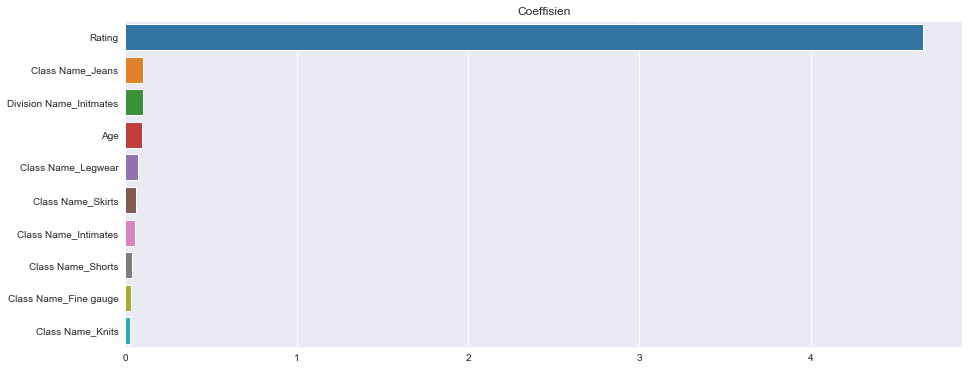

In [45]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,6))
feature = pd.Series(lr_optim.coef_[0], index = X_tr.columns).sort_values(ascending=False).head(10)
sns.barplot(x = feature.values, y = feature.index).set_title('Coeffisien')

In [46]:
feature

Rating                     4.652177
Class Name_Jeans           0.104483
Division Name_Initmates    0.100785
Age                        0.098424
Class Name_Legwear         0.072360
Class Name_Skirts          0.060448
Class Name_Intimates       0.054692
Class Name_Shorts          0.036002
Class Name_Fine gauge      0.034482
Class Name_Knits           0.028000
dtype: float64

### The Curve from max coeff

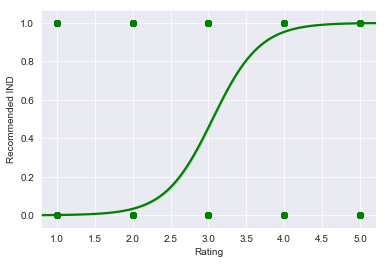

In [47]:
import seaborn as sns
sns.regplot(x='Rating', y='Recommended IND', data=data, logistic=True, color='green')

# Export CSV

In [48]:
#import pickle

In [49]:
# filename = 'finalized_model_copy2.sav'
# pickle.dump(lr_optim, open(filename, 'wb'))

In [50]:
# filename = 'x_under_dummies_colomn_copy2.sav'
# pickle.dump(x_under.columns, open(filename , 'wb'))

In [51]:
# filename = 'real_colomn_copy2.sav'
# pickle.dump(data[['Age', 'Rating', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']].columns, open(filename , 'wb'))

In [52]:
# filename = 'scaler_copy2.sav'
# pickle.dump(scaler, open(filename , 'wb'))

# Notes:

In [ ]:
#casual bottoms index = 11952 (x_scaled dummiesnya : 150.422738)
#chemises index = 12946 (x_scaled dummiesnya : 150.422738)

In [ ]:
#age,rating,positive feedback count, division name, department name, class name